In [2]:
import sympy
sympy.init_printing()

import numpy

import matplotlib.pyplot as plt

import sys
sys.path.insert(0, './code')

from gauss_legendre import gauss_legendre
from evaluate_functional import evaluate_functional

## Kepler problem

In [3]:
from sympy.abc import G, m, V, L, H

q_x = sympy.Symbol('q_x')
q_y = sympy.Symbol('q_y')
p_x = sympy.Symbol('p_x')
p_y = sympy.Symbol('p_y')

x = [q_x, q_y, p_x, p_y]

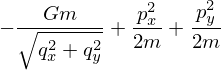

In [4]:
V = - G * m / sympy.sqrt(q_x**2 + q_y**2)
L = sympy.Rational(1,2) * (p_x**2 / m + p_y**2 / m)
H = L + V
H

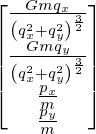

In [5]:
dH = sympy.Matrix([H.diff(co) for co in x])
dH

In [6]:
J = sympy.Matrix([[0, 0, 1, 0],
                  [0, 0, 0, 1],
                  [-1, 0, 0, 0],
                  [0, -1, 0, 0]])

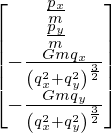

In [7]:
F = J @ dH
F

In [8]:
params = {
    # mass of the planet (kg)
    m: 4.0,
    
    # gravitational constant (m**3/s**2)
    G: 10.0
}

### stationary orbit

$F_G \overset{!}{=} F_{\omega}$

$\frac{G \, m}{r^2} \overset{!}{=} m \, \omega^2 \, r$

$\omega = \frac{G}{r^3}$

In [16]:
# compute stationary orbit
r = 5.0
ω = numpy.sqrt(params[G]/r**3)

x_0 = numpy.array([0.0, r, params[m] * r * ω, 0.0], dtype=float)
t_f = 260.0
dt = 0.1
s = 2

In [17]:
%time time, solution = gauss_legendre(x, F, x_0, t_f, dt, s, params=params)

CPU times: user 926 ms, sys: 6.88 ms, total: 933 ms
Wall time: 929 ms


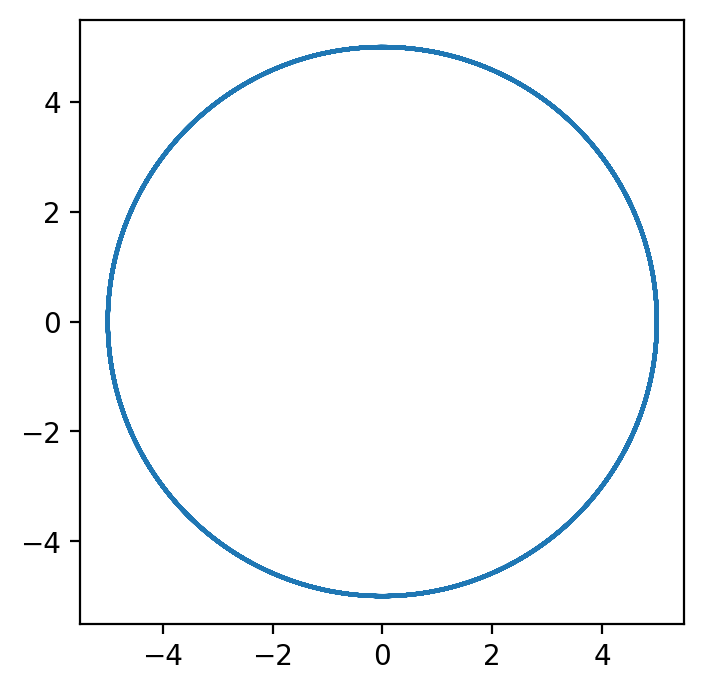

In [18]:
fig, ax = plt.subplots(dpi=200)
ax.set_aspect('equal')
ax.plot(solution[:, 0], solution[:, 1]);

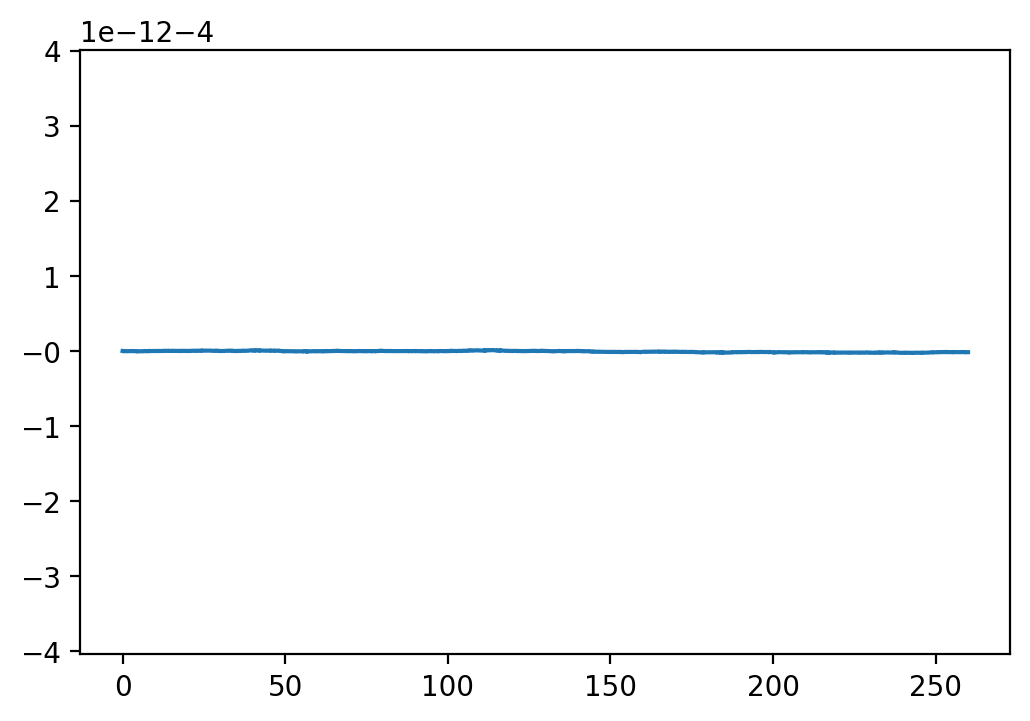

In [19]:
fig, ax = plt.subplots(dpi=200)
energy = evaluate_functional(x, H, solution, params=params)
ax.plot(time, energy);
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

In [20]:
numpy.max(energy) - numpy.min(energy)